In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import glob
import os
from PIL import Image
import pandas as pd
import copy
from PIL import Image, ImageOps

In [2]:
sample_num = 0

root = '/home/electron/Desktop/rovit dataset/amme dataset/'
path = os.path.join(root,'annotated_frames')
lpath = os.path.join(root,'projections_2d')
bpath = os.path.join(root,'bounding_boxes')
path_save = root

5636
/home/electron/Desktop/rovit dataset/amme dataset/annotated_frames/data_1
0
500
1000
1500
2000
2500
/home/electron/Desktop/rovit dataset/amme dataset/annotated_frames/data_2
0
500
1000
1500
2000
2500
(480, 640, 3)


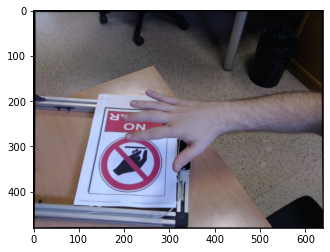

In [3]:
sample_num = 0
for folder in sorted(glob.glob(os.path.join(path,'data_'+'[1-2]'))):
    sample_num += len(glob.glob(os.path.join(folder,'*.jpg')))

images = []*sample_num
print(sample_num)

for foldername in sorted(glob.glob(os.path.join(path,'data_'+'[1-2]'))):
    print(foldername)
    for i,filename in enumerate(sorted(glob.glob(os.path.join(foldername,'*.jpg')))):
        if i%250 == 0:
            print(i)
        #image = np.array(Image.open(filename))
        image = Image.open(filename)
        images.append(copy.copy(image))
        image.close()
        

print(np.shape(images[0]))
plt.imshow(images[0])

In [4]:
sample_num = 0
for folder in sorted(glob.glob(os.path.join(lpath,'data_'+'[1-2]'))):
    sample_num += len(glob.glob(os.path.join(folder,'*.txt')))

labels = []*sample_num
print(sample_num)

for foldername in sorted(glob.glob(os.path.join(lpath,'data_'+'[1-2]'))):
    print(foldername)
    for i,filename in enumerate(sorted(glob.glob(os.path.join(foldername,'*.txt')))):
        if i%500 == 0:
            print(i)        
        label=pd.read_csv(filename,delimiter =' ', header = None, usecols = [1,2]).values
        labels.append(label)

5636
/home/electron/Desktop/rovit dataset/amme dataset/projections_2d/data_1
0
500
1000
1500
2000
2500
/home/electron/Desktop/rovit dataset/amme dataset/projections_2d/data_2
0
500
1000
1500
2000
2500


In [5]:
sample_num = 0
for folder in sorted(glob.glob(os.path.join(bpath,'data_'+'[1-2]'))):
    sample_num += len(glob.glob(os.path.join(folder,'*.txt')))

blabels = []*sample_num
print(sample_num)

for foldername in sorted(glob.glob(os.path.join(bpath,'data_'+'[1-2]'))):
    print(foldername)
    for i,filename in enumerate(sorted(glob.glob(os.path.join(foldername,'*.txt')))):
        if i%500 == 0:
            print(i)        
        blabel=pd.read_csv(filename,delimiter =' ' , header = None, usecols = [1]).values
        blabels.append(blabel)

5636
/home/electron/Desktop/rovit dataset/amme dataset/bounding_boxes/data_1
0
500
1000
1500
2000
2500
/home/electron/Desktop/rovit dataset/amme dataset/bounding_boxes/data_2
0
500
1000
1500
2000
2500


0


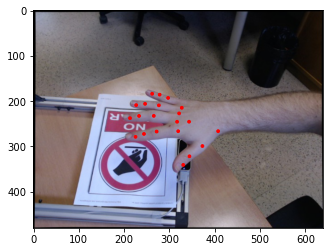

In [6]:
from matplotlib.patches import Circle
import random
i = random.randint(1,8000)
i = 0
print(i)
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(images[i])

for xx,yy in labels[i]:
    circ = Circle((xx,yy),3, color = 'red')
    ax.add_patch(circ)

In [7]:
print(len(images))
print(len(labels))
print(len(blabels))

5636
5636
5636


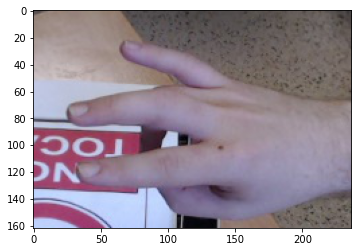

In [8]:
myrandom=random.randint(1,30)
for i,_ in enumerate(images):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    plt.imshow(images[i].crop((l,t,r,b)))
    
    if(i==myrandom):
        break
    
    
    

In [9]:
mh,mw = 0,0
for i,_ in enumerate(blabels):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    
    if(b-t>mh):
        mh=b-t
    if(r-l>mw):
        mw=r-l
        
print(mh,mw)

282 334


In [10]:
cropped = sample_num * []


for i,_ in enumerate(images):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    cropped.append(images[i].crop((l,t,r,b)))
    

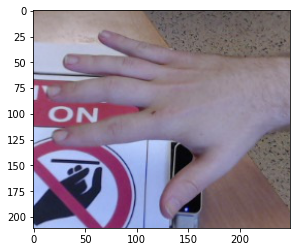

In [11]:
plt.imshow(cropped[0])

In [12]:
images = None
padded = sample_num * []


for i,item in enumerate(cropped):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    right_pad = mw-item.size[0]
    bottom_pad = mh-item.size[1]
    padded.append(ImageOps.expand(cropped[i], (0,0,right_pad,bottom_pad)))

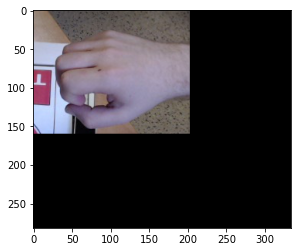

In [13]:
plt.imshow(padded[100])

In [14]:
labels = np.array(labels)

In [15]:
for i,item in enumerate(labels):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    labels[i,:,0] = labels[i,:,0] - l 
    labels[i,:,1] = labels[i,:,1] - t
    

In [16]:
np.amin(np.array(labels)[:,:,1])

17.775353484295294

In [17]:
print(np.shape(labels))
print(np.shape(blabels))

(5636, 21, 2)
(5636, 4, 1)


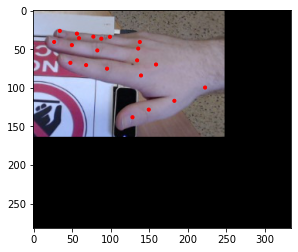

In [18]:
jo = random.randint(1,8000)
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(padded[jo])

for xx,yy in labels[jo]:
    circ = Circle((xx,yy),2, color = 'red')
    ax.add_patch(circ)

In [19]:
cropped = None
padded_pickle = sample_num * []
labels_pickle = sample_num * []
blabels_pickle = sample_num * []


for i,item in enumerate(padded):
    padded_pickle.append(np.array(padded[i]))
padded_pickle=np.array(padded_pickle)    

for i,item in enumerate(labels):
    labels_pickle.append(np.array(labels[i]))
labels_pickle=np.array(labels_pickle) 


for i,item in enumerate(blabels):
    blabels_pickle.append(np.array(blabels[i]))
blabels_pickle=np.array(blabels_pickle) 

In [20]:
print(padded_pickle.shape)
print(labels_pickle.shape)
print(blabels_pickle.shape)

del padded,labels, blabels

(5636, 282, 334, 3)
(5636, 21, 2)
(5636, 4, 1)


In [21]:
my_dict = {'padded':padded_pickle,'labels':labels_pickle,'blabels':blabels_pickle}

for key in my_dict.keys():
    print(my_dict[key].shape)


(5636, 282, 334, 3)
(5636, 21, 2)
(5636, 4, 1)


In [22]:
with open('data_hand_pose.pickle','wb') as file_to_dump:
    pickle.dump(my_dict,file_to_dump)

    

In [23]:
# file_to_dump=open('data_hand_pose3.pickle','wb')
# pickle.dump(my_dict,file_to_dump)

# file_to_dump.close()